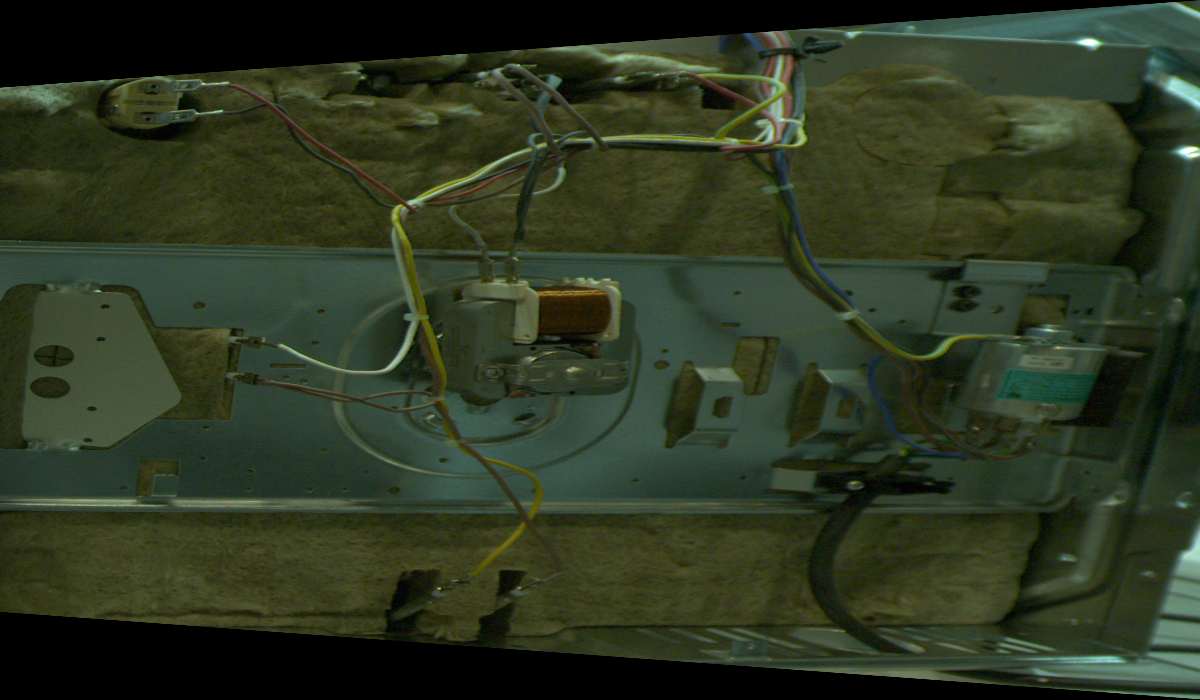

Saved as warped_template.jpg


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(path)
    return img

def warp_back_image(image, scale=0.5):
    bordered_image = cv2.copyMakeBorder(
        image, 200, 200, 0, 0,
        borderType=cv2.BORDER_CONSTANT,
        value=[0, 0, 0]
    )

    left_top     = np.array([290/scale,   0/scale])
    right_top    = np.array([860/scale, 100/scale])
    right_bottom = np.array([860/scale, 700/scale])
    left_bottom  = np.array([290/scale, 800/scale])

    src_points = np.array([left_top, right_top, right_bottom, left_bottom], dtype="float32")

    width, height = 1200, 700
    dst_points = np.array([[0,0],[width-1,0],[width-1,height-1],[0,height-1]], dtype="float32")

    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(bordered_image, M, (width, height))
    return warped

# ======= RUN HERE =======
input_image_path = "/content/13.png"
template_img = load_image(input_image_path)

warped_template = warp_back_image(template_img)
cv2_imshow(warped_template)
cv2.imwrite("/content/warped_template.jpg", warped_template)
print("Saved as warped_template.jpg")
